## Welcome to GCDS

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

import random
random.seed(1337)

## Instruction
Please go through question listed below (adding new cells if required), please provide comments to justify your models

## A. Classification

In [9]:
# creating a classification model with 2 classes and 2 features
X, y = make_classification(n_samples= 200, n_classes=2, n_features=2, 
                           n_redundant = 0, n_informative = 2,
                           n_clusters_per_class = 1, 
                           weights = (0.95, 0.05))

**Q1.** The above code creates a biased dataset with 2 classes. Please visualise the classes using scatter plot below.

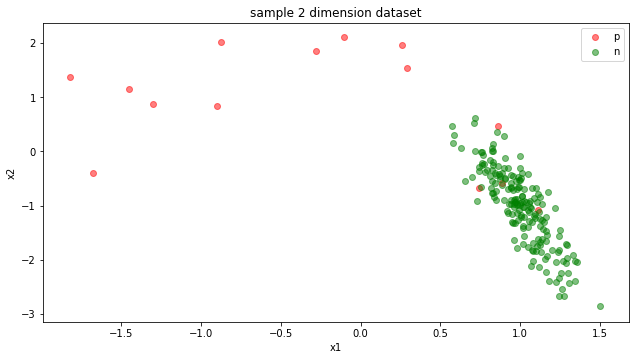

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt


fig, ax = plt.subplots()
fig.set_size_inches(10.5, 5.5)

X_n = X[np.where(y==0)]
X_p = X[np.where(y==1)]

ax.scatter(x = X_p[:,0], y = X_p[:,1], c='r', alpha = 0.5, label='p')
ax.scatter(x = X_n[:,0], y = X_n[:,1], c='g', alpha = 0.5, label='n')
ax.set_title('sample 2 dimension dataset')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()

**Q2.** Write a supervised classification model to predict the *minority class*

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# pipeline 
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_scv", SVC())
])

# fit
svm_clf.fit(X_train, y_train)

# is accuracy a good score?
cross_val_score(svm_clf, X_train, y_train, cv=5, scoring = 'accuracy')

# generate confusion matrix 
confusion_matrix(y_test, svm_clf.predict(X_test))

array([[62,  0],
       [ 0,  4]])

**Q3.** Treating records in the *minority class* as anomalies,  please write an anomaly detection/unsupervised model to detect those records.

In [12]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0)
outliers = clf.fit_predict(X)

**Q4.** Visualise anomalies detect on scatter plot from Q1

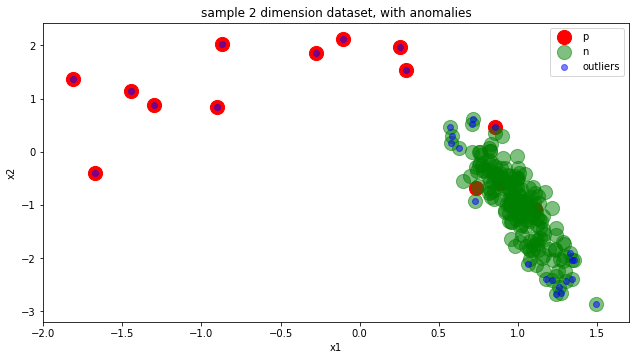

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10.5, 5.5)

X_n = X[np.where(y==0)]
X_o = X[np.where(outliers==-1)]
X_p = X[np.where(y==1)]

ax.scatter(x = X_p[:,0], y = X_p[:,1], c='r', alpha = 1, s = 200, label='p')
ax.scatter(x = X_n[:,0], y = X_n[:,1], c='g', alpha = 0.5, s = 200, label='n')
ax.scatter(x = X_o[:,0], y = X_o[:,1], c='b', alpha = 0.5, label='outliers')
ax.set_title(f"sample 2 dimension dataset, with anomalies")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()

## B. Computer Science

In [14]:
x = np.random.randint(1000, size = 1000)

**Q5.** Given above arrange with 1000 random number, implement a sorting algorithm.  

In [16]:
def insertionSort(arr): 
    # Traverse through 1 to len(arr) 
    for i in range(1, len(arr)): 
        key = arr[i] 
  
        # Move elements of arr[0..i-1], that are 
        # greater than key, to one position ahead 
        # of their current position 
        j = i-1
        while j >= 0 and key < arr[j] : 
                arr[j + 1] = arr[j] 
                j -= 1
        arr[j + 1] = key 

insertionSort(x)

**Q6.** what is the computation complexity of above code?

$O(n*2)$